##### This project explores publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). This project aims to create a model to show profiles of borrowers with a high probability of paying back this loan. The columns in the dataset represent the following:

###### `credit.policy`: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
###### `purpose`: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
###### `int.rate`: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
###### `installment`: The monthly installments owed by the borrower if the loan is funded.
###### `log.annual.inc`: The natural log of the self-reported annual income of the borrower.
###### `dti`: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
###### `fico`: The FICO credit score of the borrower.(A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.)
###### `days.with.cr.line`: The number of days the borrower has had a credit line.
###### `revol.bal`: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
###### `revol.util`: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
###### `inq.last.6mths`: The borrower's number of inquiries by creditors in the last 6 months.
###### `delinq.2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
###### `pub.rec`: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df = pd.read_csv('loan_data.csv')
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
len(df)

9578

In [4]:
df.shape

(9578, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:>

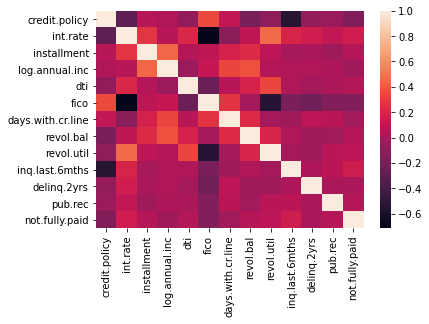

In [8]:
sns.heatmap(df.corr())

In [9]:
conditions = [
    (df['fico'] >= 800) & (df['fico'] <=850),
    (df['fico'] >= 740) & (df['fico'] <=799),
    (df['fico'] >= 670) & (df['fico'] <=739),
    (df['fico'] >= 580) & (df['fico'] <=669),
    (df['fico'] >= 300) & (df['fico'] <=579),
    (df['fico'] < 300)
]
values = ['EXCELLENT', 'VERY GOOD', 'GOOD', 'FAIR','POOR','UNAUTHORIZED']
df['fico_rate'] = np.select(conditions, values)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_rate
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,GOOD
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,GOOD
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,GOOD
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,GOOD
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,FAIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,GOOD
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,GOOD
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,GOOD
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,GOOD


In [ ]:
# OR THIS...
def fico_rate(i):
    if i>=800 and i<=850:
        return 'EXCELLENT'
    elif i>=740 and i<=799:
        return 'VERY GOOD'
    elif i>=670 and i <=739:
        return 'GOOD'
    elif i>=580 and i <=669:
        return 'FAIR'
    elif i>=300 and i <=579:
        return 'POOR'
    else:
        return 'UNAUTHORIZED'
df['fico_rate'] = df['fico'].apply(fico_rate)
print(df)

<AxesSubplot:xlabel='fico_rate', ylabel='count'>

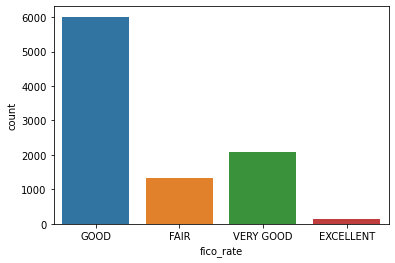

In [10]:
sns.countplot(x='fico_rate', data = df)

C:\Users\maryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int.rate', ylabel='Density'>

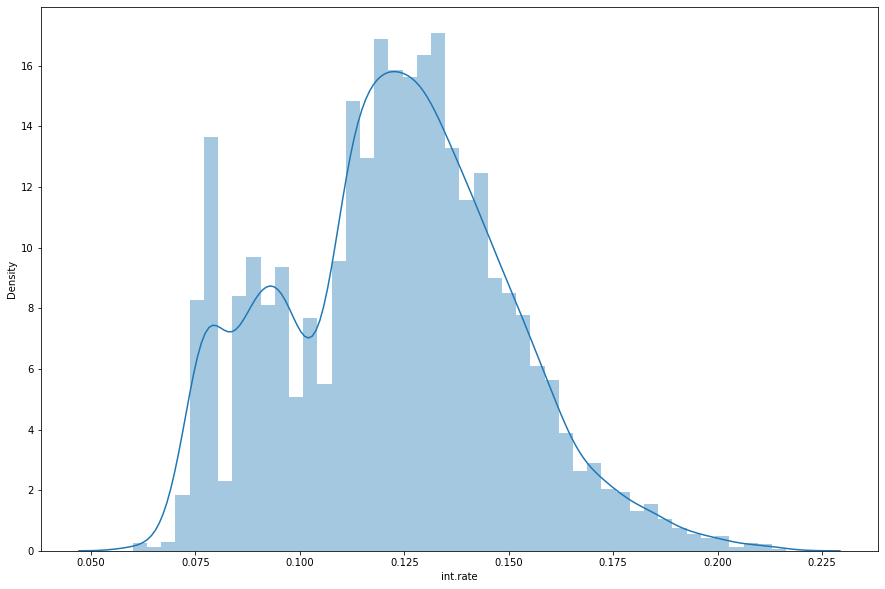

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['int.rate'])

Text(0.5, 0, 'fico')

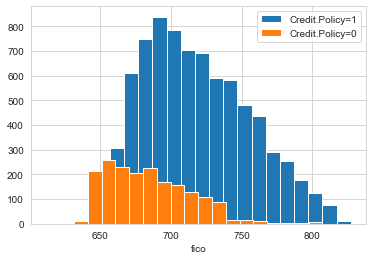

In [12]:
sns.set_style('whitegrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=20, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=20, label='Credit.Policy=0')
plt.legend()
plt.xlabel('fico')

Text(0.5, 0, 'FICO')

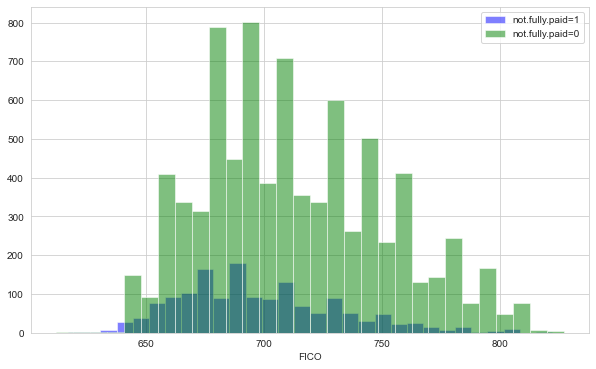

In [13]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

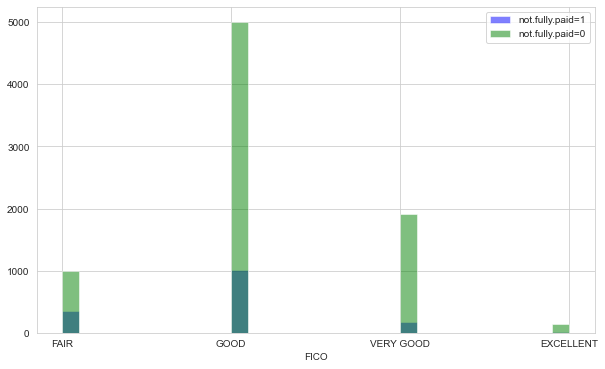

In [14]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico_rate'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico_rate'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

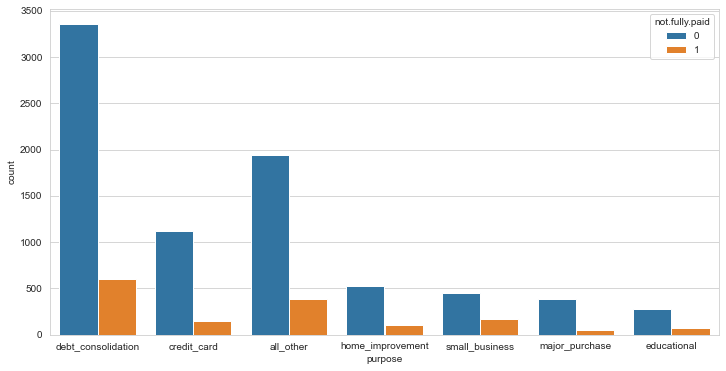

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

C:\Users\maryam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


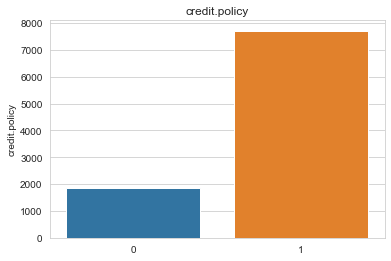

C:\Users\maryam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


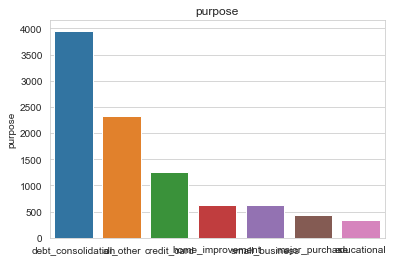

C:\Users\maryam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


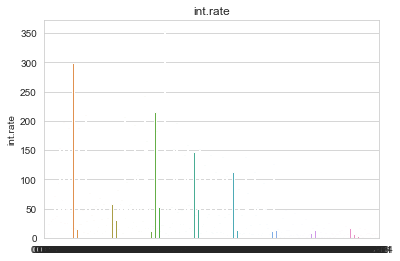

C:\Users\maryam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

In [70]:
for i in df.columns:
    sns.barplot(df[i].value_counts().index,df[i].value_counts()).set_title(i)
    plt.show()

In [16]:
dum = pd.get_dummies(df.purpose, prefix = 'Purpose')
dum.head()

,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [17]:
df=df.join(dum)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,pub.rec,not.fully.paid,fico_rate,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,GOOD,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,GOOD,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,GOOD,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,GOOD,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,0,0,FAIR,0,1,0,0,0,0,0


In [18]:
df.drop(['purpose'],axis=1,inplace =True)
df.drop(['fico_rate'],axis=1,inplace =True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [51]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [61]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 2, min_samples_leaf = 5)

In [62]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=100)

In [63]:
y_pred = clf_entropy.predict(X_test)

In [64]:
print('Accuracy is', accuracy_score(y_test,y_pred)*100)

Accuracy is 83.22894919972164


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=2, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [69]:
predRF = rfc.predict(X_test)

In [70]:
print('Accuracy is', accuracy_score(y_test,predRF)*100)

Accuracy is 83.12456506610995


In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
predictionRF = rfc.predict(X_test)

In [72]:
print('Accuracy is', accuracy_score(y_test,predictionRF)*100)

Accuracy is 83.22894919972164
